**Author**: CodeForAll  
**License**: MIT License

--- 


### **Mass-Spring-Damper System Simulation: Position and Velocity Response**

In this experiment, we simulate the dynamics of a **mass-spring-damper** system using the **state-space representation**. The system is excited by a **step input** force applied at $t = 0$. The main objective is to analyze how the **position** and **velocity** of the mass evolve over time.

---

### **System Description:**

A mass-spring-damper system can be modeled by the following second-order differential equation:

$$
m \ddot{x}(t) + c \dot{x}(t) + k x(t) = u(t)
$$

Where:
- $m$ is the mass of the object (in kg),
- $c$ is the damping coefficient (in Ns/m),
- $k$ is the spring constant (in N/m),
- $x(t)$ is the position of the mass as a function of time,
- $\dot{x}(t)$ is the velocity of the mass,
- $u(t)$ is the external force applied to the system.

This equation is converted into the **state-space form** to facilitate numerical simulations. The state-space representation is defined as:

$$
\dot{x}(t) = A x(t) + B u(t)
$$
$$
y(t) = C x(t) + D u(t)
$$

Where:
- $x(t) = \begin{bmatrix} x(t) \\ \dot{x}(t) \end{bmatrix}$ is the state vector, with $x(t)$ being the position and $\dot{x}(t)$ the velocity.
- $u(t)$ is the input force.
- $y(t)$ is the output of the system (in this case, the position of the mass).
- $A, B, C, D$ are the system matrices.

The state-space matrices for this system are given by:

$$
A = \begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{c}{m} \end{bmatrix}, \quad
B = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}, \quad
C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
D = \begin{bmatrix} 0 \end{bmatrix}
$$

---

### **Code Explanation:**

1. **Defining the System Parameters**:
   - The mass $m = 1.0$ kg, the damping coefficient $c = 2.0$ Ns/m, and the spring constant $k = 5.0$ N/m are specified.
   
2. **State-Space Matrices**:
   - The system matrices $A$, $B$, $C$, and $D$ are created based on the equations of motion. These matrices govern the dynamics of the system.

3. **Create State-Space System**:
   - Using the `control.ss` function, we create the state-space system using the matrices $A$, $B$, $C$, and $D$.

4. **Simulating the System**:
   - A time vector $T$ from 0 to 10 seconds is defined, with 500 points.
   - A **step input** force $u(t) = 1$ N is applied for the entire simulation duration.
   - The function `input_output_response` is used to compute the output and states of the system (position and velocity) over time.

5. **Plotting the Response**:
   - The position $x_1(t)$ and velocity $x_2(t)$ are plotted against time. The position represents the output of the system, and the velocity is one of the internal states.

---

### **Result and Interpretation:**

- **Position** ($x(t)$):

  The **position** of the mass shows the motion of the mass over time. Initially, the mass is at rest ($x(0) = 0$). When the force is applied, the mass begins to move. The oscillations in the position arise from the spring's restoring force and the damping effect, which causes the oscillations to gradually decay.

- **Velocity** ($\dot{x}(t)$):

  The **velocity** shows how fast the mass is moving at any point in time. Initially, the velocity is 0. When the force is applied, the velocity increases as the mass accelerates. Eventually, the velocity approaches zero as the system comes to rest.

### **Key Observations**:

- The **damped oscillations** indicate that the system is underdamped, meaning it oscillates before gradually coming to rest.
- Both the **position** and **velocity** reach a steady state after some oscillations due to the effect of damping.

---

### **Conclusion**:

From the results, we can conclude that the system exhibits **underdamped behavior**, where the position oscillates around a final equilibrium position, and the velocity gradually decays to zero. The **damping** in the system ensures that the oscillations do not persist indefinitely but decay over time, leading to a steady state.

If we had a **heavier mass** or **higher damping**, the system would settle more quickly, with fewer oscillations. Conversely, a **stiffer spring** (higher $k$) would result in faster oscillations before the system reaches equilibrium.

---

### **Mathematical Formulas:**

1. The equation of motion for the mass-spring-damper system:

$$
m \ddot{x}(t) + c \dot{x}(t) + k x(t) = u(t)
$$

2. The system dynamics in state-space form:

$$
\dot{x}(t) = A x(t) + B u(t)
$$
$$
y(t) = C x(t) + D u(t)
$$

3. The state-space matrices:

$$
A = \begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{c}{m} \end{bmatrix}, \quad
B = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}, \quad
C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
D = \begin{bmatrix} 0 \end{bmatrix}
$$

---

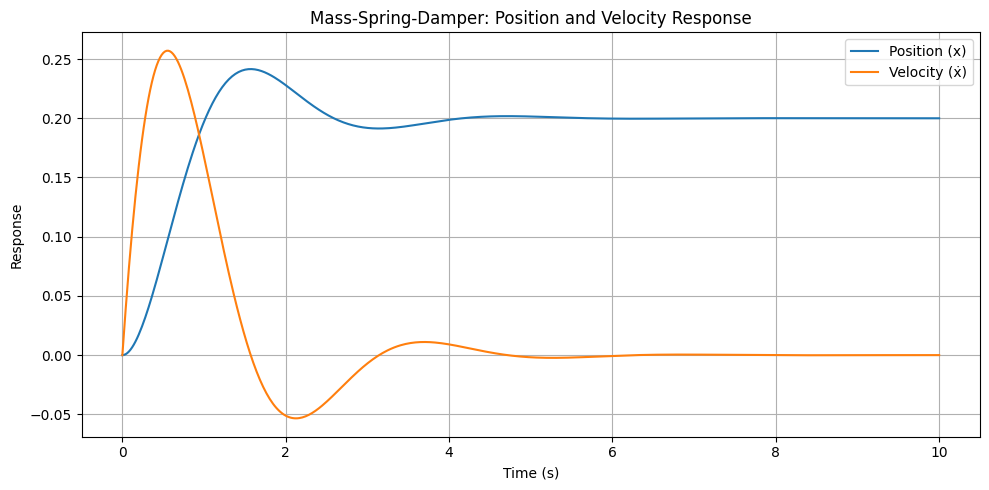

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import ss, input_output_response

# System parameters
m = 1.0   # kg
c = 2.0   # Ns/m
k = 5.0   # N/m

# State-space matrices
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.array([[0],
              [1/m]])
C = np.array([[1, 0]]) 
D = np.array([[0]])

# Create state-space system
system = ss(A, B, C, D)

# Time vector and input (step input)
T = np.linspace(0, 10, 500)
U = np.ones_like(T)

# Simulate system
T, yout, xout = input_output_response(system, T, U, return_x=True)

# Plot position and velocity
plt.figure(figsize=(10, 5))
plt.plot(T, xout[0], label='Position (x)')
plt.plot(T, xout[1], label='Velocity (ẋ)')
plt.title("Mass-Spring-Damper: Position and Velocity Response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
